In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Filter for the Job Titles and countries

df_UK = df[df['job_country'] == 'United Kingdom'].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_UK['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [5]:
df_UK_top6 = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [6]:
job_order = df_UK_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

C:\Users\User\AppData\Local\Temp\ipykernel_26136\702957869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette=['#9B111E'])
C:\Users\User\AppData\Local\Temp\ipykernel_26136\702957869.py:1: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette=['#9B111E'])


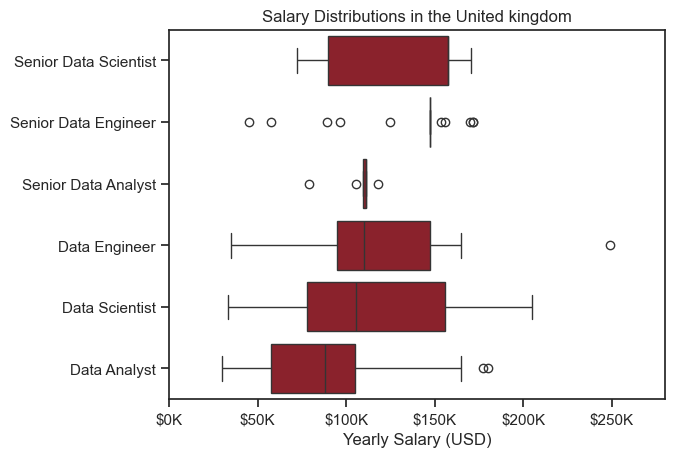

In [19]:
sns.boxplot(data=df_UK_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette=['#9B111E'])
sns.set_theme(style='ticks')

plt.title('Salary Distributions in the United kingdom')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 280000)
ticks_x=plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salaries vs Skills for Data Analysts

In [8]:
df_DA_UK = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [9]:
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

In [10]:
df_DA_UK = df_DA_UK.explode('job_skills')

In [11]:
df_DA_UK[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [12]:
df_DA_top_pay = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [13]:
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pandas,1,177283.0
tensorflow,1,177283.0
numpy,1,177283.0
c++,1,177283.0
pytorch,1,177283.0
aurora,1,165000.0
mongodb,2,165000.0
mysql,3,165000.0
aws,3,165000.0


In [14]:
df_DA_skills = df_DA_UK.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
tableau,13,100500.0
sql,33,98500.0
looker,6,96012.5
python,25,89100.0
power bi,7,89100.0
sas,8,80007.0
r,9,77017.5
excel,29,75550.0
go,9,71000.0


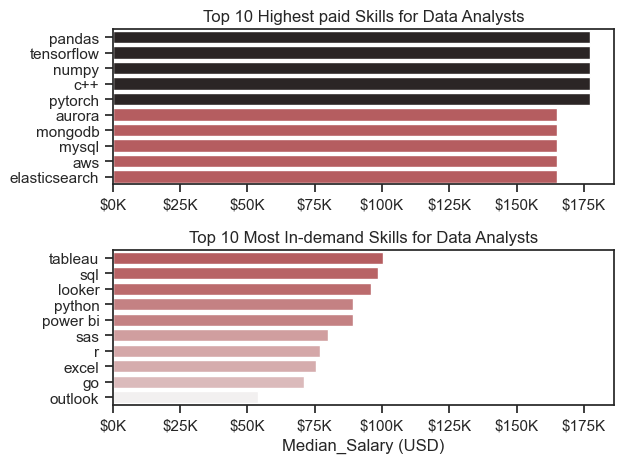

In [15]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:r_r')
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Top 10 Highest paid Skills for Data Analysts')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))

# Top 10 most In-demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:r')
ax[1].legend().remove()
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlabel('Median_Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))


fig.tight_layout()
plt.show()